In [57]:
from os import removedirs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

from torch.nn.functional import threshold

warnings.filterwarnings('ignore')

In [58]:
def round_floats(dataframe: pd.DataFrame) -> pd.DataFrame:
    """
    Replace floating point numbers with more than one decimal place
    with their one decimal place approximation in a DataFrame.
    
    :param dataframe: 
    :param df: Input pandas DataFrame
    :return: Modified pandas DataFrame with rounded float values
    """
    return dataframe.applymap(lambda x: round(x, 1) if isinstance(x, float) and round(x, 10) != round(x, 1) else x)

In [59]:
data = {
    'School ID': [101, 102, 103, np.nan, 105, 106, 107, 108],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Henry'],
    'Address': ['123 Main St', '456 Oak Ave', '789 Pine Ln', '101 Elm St', np.nan, '222 Maple Rd', '444 Cedar Blvd', '555 Birch Dr'],
    'City': ['Los Angeles', 'New York', 'Houston', 'Los Angeles', 'Miami', np.nan, 'Houston', 'New York'],
    'Subject': ['Math', 'English', 'Science', 'Math', 'History', 'Math', 'Science', 'English'],
    'Marks': [85, 92, 78, 89, np.nan, 95, 80, 88],
    'Rank': [2, 1, 4, 3, 8, 1, 5, 3],
    'Grade': ['B', 'A', 'C', 'B', 'D', 'A', 'C', 'B']
}

In [60]:
df = pd.DataFrame(data)
df

,School ID,Name,Address,City,Subject,Marks,Rank,Grade
0,101.0,Alice,123 Main St,Los Angeles,Math,85.0,2,B
1,102.0,Bob,456 Oak Ave,New York,English,92.0,1,A
2,103.0,Charlie,789 Pine Ln,Houston,Science,78.0,4,C
3,NaN,David,101 Elm St,Los Angeles,Math,89.0,3,B
4,105.0,Eva,NaN,Miami,History,NaN,8,D
5,106.0,Frank,222 Maple Rd,NaN,Math,95.0,1,A
6,107.0,Grace,444 Cedar Blvd,Houston,Science,80.0,5,C
7,108.0,Henry,555 Birch Dr,New York,English,88.0,3,B


In [61]:
# Data cleaning
# Drop rows with missing values

df_cleaned = df.dropna()

print("\nCleaned DataFrame:")
df_cleaned


Cleaned DataFrame:


,School ID,Name,Address,City,Subject,Marks,Rank,Grade
0,101.0,Alice,123 Main St,Los Angeles,Math,85.0,2,B
1,102.0,Bob,456 Oak Ave,New York,English,92.0,1,A
2,103.0,Charlie,789 Pine Ln,Houston,Science,78.0,4,C
6,107.0,Grace,444 Cedar Blvd,Houston,Science,80.0,5,C
7,108.0,Henry,555 Birch Dr,New York,English,88.0,3,B


In [62]:
# mean, median, mode imputation

# First on the Marks column

mean_imputation = df['Marks'].fillna(df['Marks'].mean())
median_imputation = df['Marks'].fillna(df['Marks'].median())
mode_imputation = df['Marks'].fillna(df['Marks'].mode())

print("\nMean Imputation:")
# mean_imputation = round_floats(mean_imputation)
mean_imputation


Mean Imputation:


0    85.000000
1    92.000000
2    78.000000
3    89.000000
4    86.714286
5    95.000000
6    80.000000
7    88.000000
Name: Marks, dtype: float64

In [63]:
print("\nMedian Imputation:")
median_imputation


Median Imputation:


0    85.0
1    92.0
2    78.0
3    89.0
4    88.0
5    95.0
6    80.0
7    88.0
Name: Marks, dtype: float64

In [64]:
print("\nMode Imputation:")
mode_imputation


Mode Imputation:


0    85.0
1    92.0
2    78.0
3    89.0
4    89.0
5    95.0
6    80.0
7    88.0
Name: Marks, dtype: float64

In [65]:
# forward fill and backward fill

forward_fill = df['Marks'].fillna(method='ffill')
backward_fill = df['Marks'].fillna(method='ffill')

In [66]:
forward_fill

0    85.0
1    92.0
2    78.0
3    89.0
4    89.0
5    95.0
6    80.0
7    88.0
Name: Marks, dtype: float64

In [67]:
backward_fill

0    85.0
1    92.0
2    78.0
3    89.0
4    89.0
5    95.0
6    80.0
7    88.0
Name: Marks, dtype: float64

In [68]:
# Interpolation

# Interpolation is a method of estimating unknown values that fall within the range of known values.
# It is often used for time series data or when the data points are evenly spaced.
# In this case, we will use linear interpolation to fill in the missing values in the Marks column.

# Linear interpolation
linear_interpolation = df['Marks'].interpolate(method='linear')

# Quadratic interpolation
quadratic_interpolation = df['Marks'].interpolate(method='quadratic')

# Polynomial interpolation
polynomial_interpolation = df['Marks'].interpolate(method='polynomial', order=2)

In [69]:
linear_interpolation

0    85.0
1    92.0
2    78.0
3    89.0
4    92.0
5    95.0
6    80.0
7    88.0
Name: Marks, dtype: float64

In [70]:
quadratic_interpolation

0    85.00000
1    92.00000
2    78.00000
3    89.00000
4    98.28024
5    95.00000
6    80.00000
7    88.00000
Name: Marks, dtype: float64

In [71]:
# Outlier detection and removal

import sklearn
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
#diabetes_df['target'] = diabetes.target
#diabetes_df['target'] = diabetes_df['target'].astype(float)

diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


<Axes: ylabel='bmi'>

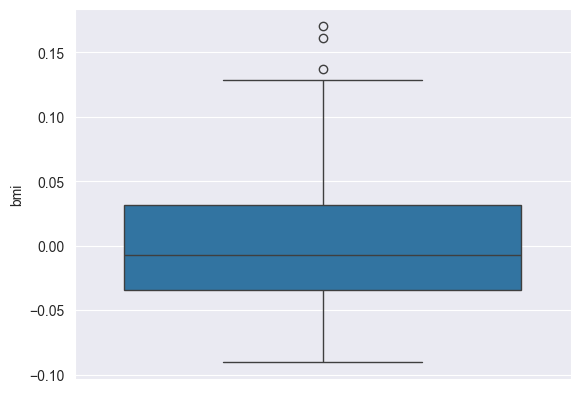

In [72]:
# Boxplot

sns.boxplot(diabetes_df['bmi'])

In [73]:
def removal_outliers(dataframe: pd.DataFrame, column: str, threshold: float) -> pd.DataFrame:
    """
    Remove outliers from a DataFrame based on the Z-score method.
    
    :param df: Input pandas DataFrame
    :param column: Column name to check for outliers
    :param threshold: Z-score threshold for identifying outliers
    :return: DataFrame with outliers removed
    """
    z_scores = (dataframe[column] - dataframe[column].mean()) / dataframe[column].std()
    return dataframe[(z_scores < threshold) & (z_scores > -threshold)]

In [74]:
def removal_box_plot(dataframe: pd.DataFrame, column: str, threshold: float) -> pd.DataFrame:
    sns.boxplot(data=dataframe[column])
    
    plt.title(f"Original Box plot of column {column}")
    plt.show()
    
    removed_outliers = dataframe[dataframe[column] <= threshold]
    sns.boxplot(data=removed_outliers[column])
    plt.title(f"Box plot of column {column} after outlier removal")
    plt.show()
    
    return removed_outliers

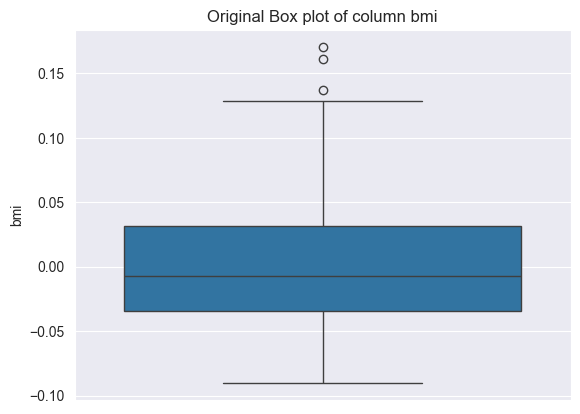

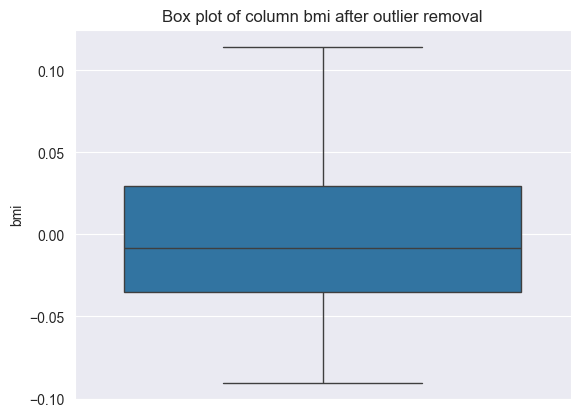

In [75]:
threshold_value = 0.12
no_outliers = removal_box_plot(diabetes_df, 'bmi', threshold_value)

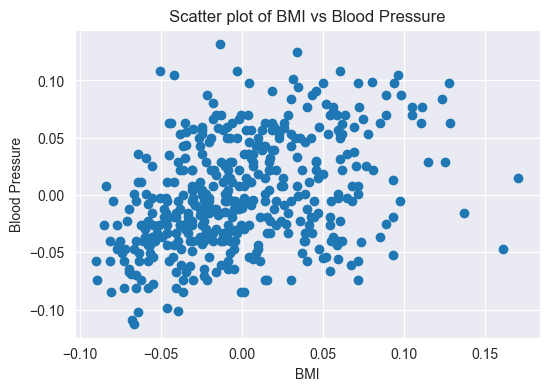

In [76]:
# Scatter plot
fig, ax = plt.subplots(figsize=(6, 4))

ax.scatter(diabetes_df['bmi'], diabetes_df['bp'])
ax.set_xlabel('BMI')
ax.set_ylabel('Blood Pressure')

ax.set_title('Scatter plot of BMI vs Blood Pressure')

plt.show()

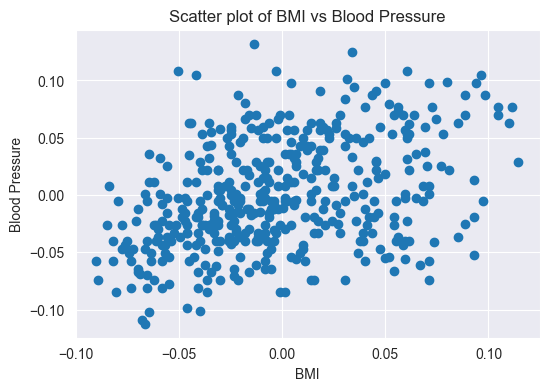

In [78]:
outlier_indices = np.where((diabetes_df['bmi'] > 0.12) & (diabetes_df['bp'] < 0.8))

no_outliers = diabetes_df.drop(outlier_indices[0])

fig, ax_no_outliers = plt.subplots(figsize=(6, 4))
ax_no_outliers.scatter(no_outliers['bmi'], no_outliers['bp'])
ax_no_outliers.set_xlabel('BMI')
ax_no_outliers.set_ylabel('Blood Pressure')

ax_no_outliers.set_title('Scatter plot of BMI vs Blood Pressure')

plt.show()

In [79]:
from scipy import stats

# Z-score method
z_scores = np.abs(stats.zscore(diabetes_df['age']))
z_scores

array([0.80050009, 0.03956713, 1.79330681, 1.87244107, 0.11317236,
       1.94881082, 0.9560041 , 1.33508832, 0.87686984, 1.49059233,
       2.02518057, 0.57139085, 0.34228161, 0.11317236, 0.95323959,
       1.1087436 , 0.11593688, 1.48782782, 0.80326461, 0.57415536,
       1.03237385, 1.79607132, 1.79607132, 0.95323959, 1.33785284,
       1.41422259, 2.25428981, 0.49778562, 1.10597908, 1.41145807,
       1.26148309, 0.49778562, 0.72413034, 0.6477606 , 0.34228161,
       1.02960933, 0.26591186, 0.19230663, 0.03956713, 0.03956713,
       0.11317236, 2.10155031, 1.26148309, 0.41865135, 0.95323959,
       0.57139085, 1.18511334, 1.64333183, 1.41145807, 0.87963435,
       0.72413034, 1.25871858, 1.1087436 , 0.19230663, 1.03237385,
       0.87963435, 0.87963435, 0.57415536, 0.87686984, 1.33508832,
       1.49059233, 0.87963435, 0.57415536, 0.72689486, 1.41145807,
       0.9560041 , 0.19230663, 0.87686984, 0.80050009, 0.34228161,
       0.03956713, 0.03956713, 1.33508832, 0.26591186, 0.26591

In [83]:
z_threshold = 2

outlier_indices_z = np.where(z_scores > z_threshold)[0]
no_outliers_z = diabetes_df.drop(outlier_indices_z)

print(f"Original dataframe shape: {diabetes_df.shape} \n\nvs \n\nNo outliers shape: {no_outliers_z.shape}")

Original dataframe shape: (442, 10) 

vs 

No outliers shape: (426, 10)


In [84]:
# IQR

# Upper Bound: Q3 + 1.5 * IQR
# Lower Bound: Q1 - 1.5 * IQR

Q1 = diabetes_df['age'].quantile(0.25)
Q3 = diabetes_df['age'].quantile(0.75)

IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Create arrays of boolean values indicating whether each value is an outlier
upper_array = np.where(diabetes_df['bmi'] >= upper_bound)[0]
lower_array = np.where(diabetes_df['bmi'] <= lower_bound)[0]

# remove the outliers
diabetes_df.drop(index=upper_array, inplace=True)
diabetes_df.drop(index=lower_array, inplace=True)

# Print the shape of the DataFrame after removing outliers
print(f"Original dataframe shape: {diabetes_df.shape} \n\nvs \n\nNo outliers shape: {no_outliers_z.shape}")

Original dataframe shape: (440, 10) 

vs 

No outliers shape: (426, 10)


In [85]:
# Feature engineering
# Feature engineering is the process of using domain knowledge to extract features from raw data
# that make machine learning algorithms work. It is a crucial step in the data preprocessing pipeline.
# It can significantly improve the performance of machine learning models.
# Feature engineering can include:
# - Creating new features from existing ones
# - Transforming features (e.g., scaling, normalization)
# - Encoding categorical variables
# - Handling missing values
# - Removing irrelevant features
# - Feature selection
# - Feature extraction
# - Feature construction
# - Feature transformation
# - Feature scaling
# - Feature normalization
# - Feature discretization
# - Feature binning

In [86]:
# Scaling

# Distanced based algorithms (e.g., KNN, SVM, NNS) are sensitive to the scale of the features.

new_df = pd.read_csv('https://media.geeksforgeeks.org/wp-content/uploads/20250114174407596134/SampleFile.csv')
new_df.head()

,LotArea,MSSubClass
0,8450,60
1,9600,20
2,11250,60
3,9550,70
4,14260,60


In [87]:
new_df.shape

(1460, 2)

In [90]:
new_df.describe()

,LotArea,MSSubClass
count,1460.000000,1460.000000
mean,10516.828082,56.897260
std,9981.264932,42.300571
min,1300.000000,20.000000
25%,7553.500000,20.000000
50%,9478.500000,50.000000
75%,11601.500000,70.000000
max,215245.000000,190.000000


In [91]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_data = scaler.fit_transform(new_df)
scale_df = pd.DataFrame(scale_data, columns=new_df.columns)

scale_df.head()

,LotArea,MSSubClass
0,0.033420,0.235294
1,0.038795,0.000000
2,0.046507,0.235294
3,0.038561,0.294118
4,0.060576,0.235294
